In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
# Plotly for interactive graphics 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [9]:
tdf = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv').sample(10000)
tdf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
125360,2013-06-15,SalmonGums,7.3,13.7,0.4,NaN,NaN,SE,17.0,ESE,...,93.0,77.0,NaN,NaN,NaN,NaN,9.4,12.6,No,No
82516,2013-05-27,Dartmoor,9.1,15.3,0.0,1.4,1.1,NNE,15.0,NaN,...,100.0,73.0,1031.4,1028.6,NaN,NaN,10.4,14.4,No,No
51882,2016-12-28,Tuggeranong,15.8,31.7,0.0,NaN,NaN,N,35.0,NaN,...,65.0,32.0,1012.0,1008.3,NaN,NaN,23.5,30.2,No,No
64244,2009-02-23,MelbourneAirport,13.4,35.0,0.0,6.6,9.0,SW,56.0,N,...,46.0,10.0,1010.6,1007.8,6.0,2.0,21.1,33.2,No,No
100968,2013-01-25,MountGambier,14.5,22.3,0.8,8.4,11.4,W,61.0,SW,...,65.0,27.0,1012.3,1015.5,6.0,3.0,16.7,20.5,No,No


In [10]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 125360 to 62795
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10000 non-null  object 
 1   Location       10000 non-null  object 
 2   MinTemp        9896 non-null   float64
 3   MaxTemp        9924 non-null   float64
 4   Rainfall       9798 non-null   float64
 5   Evaporation    5700 non-null   float64
 6   Sunshine       5210 non-null   float64
 7   WindGustDir    9271 non-null   object 
 8   WindGustSpeed  9276 non-null   float64
 9   WindDir9am     9281 non-null   object 
 10  WindDir3pm     9683 non-null   object 
 11  WindSpeed9am   9874 non-null   float64
 12  WindSpeed3pm   9768 non-null   float64
 13  Humidity9am    9814 non-null   float64
 14  Humidity3pm    9674 non-null   float64
 15  Pressure9am    8961 non-null   float64
 16  Pressure3pm    8959 non-null   float64
 17  Cloud9am       6180 non-null   float64
 18  C

In [11]:
tdf.shape

(10000, 23)

In [12]:
tdf.isnull().sum()

Date                0
Location            0
MinTemp           104
MaxTemp            76
Rainfall          202
Evaporation      4300
Sunshine         4790
WindGustDir       729
WindGustSpeed     724
WindDir9am        719
WindDir3pm        317
WindSpeed9am      126
WindSpeed3pm      232
Humidity9am       186
Humidity3pm       326
Pressure9am      1039
Pressure3pm      1041
Cloud9am         3820
Cloud3pm         4085
Temp9am           129
Temp3pm           261
RainToday         202
RainTomorrow      201
dtype: int64

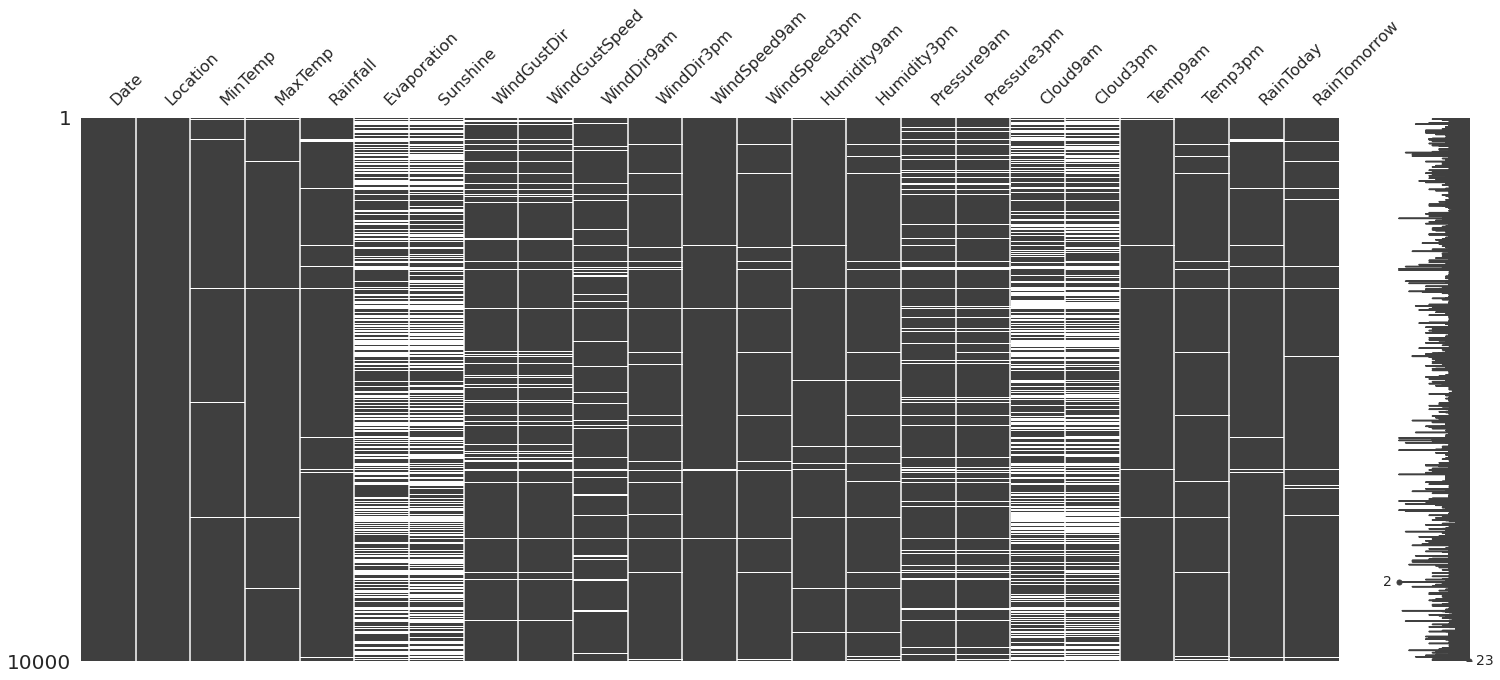

In [13]:
import missingno as msno
msno.matrix(tdf);

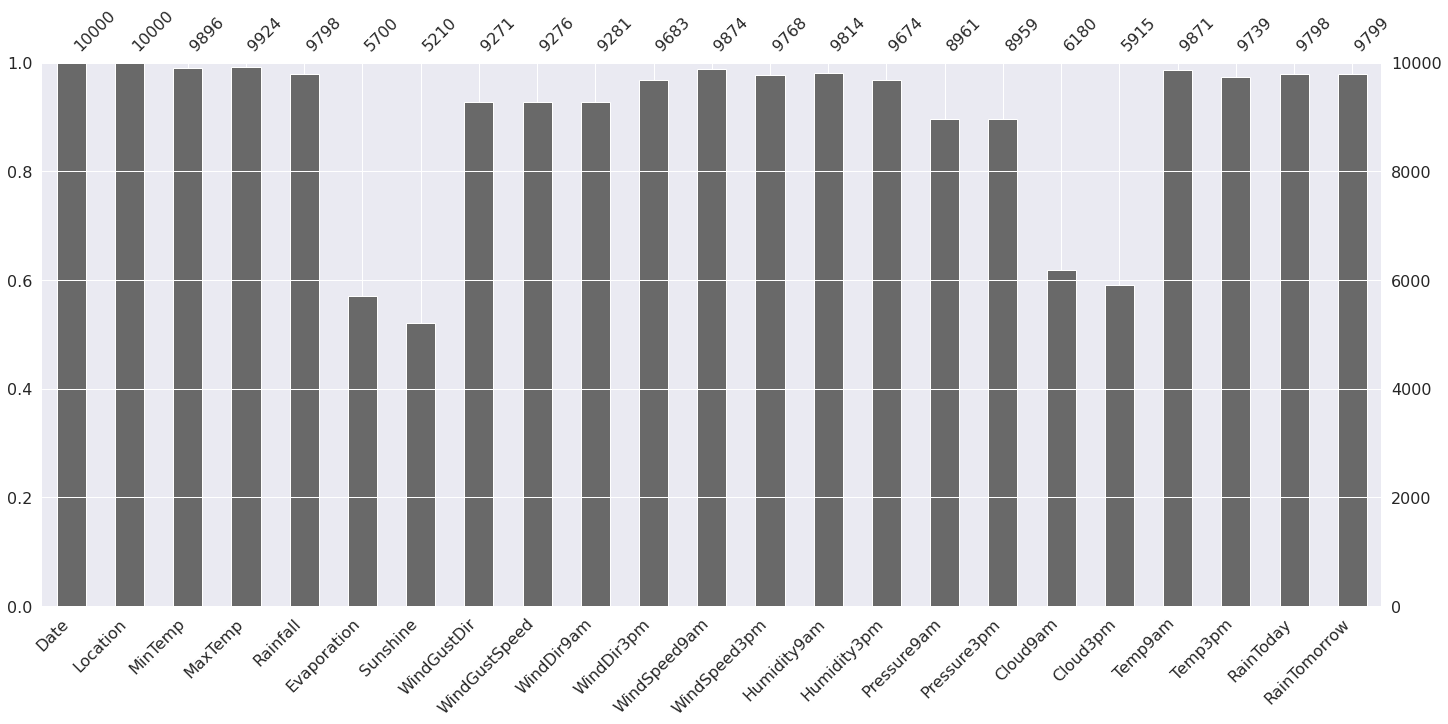

In [14]:
msno.bar(tdf);

In [15]:
missing_val = []
missing_val_rate = []
for i in tdf.columns:
    u = tdf[i].isnull().sum()
    r = (u/len(tdf)*100)
    missing_val.append(u)
    missing_val_rate.append(r)
    
y=pd.DataFrame( {"no of missing_val": missing_val,  "missing_val_rate": missing_val_rate},  index=tdf.columns)
y.sort_values("missing_val_rate", ascending=False)

,no of missing_val,missing_val_rate
Sunshine,4790,47.90
Evaporation,4300,43.00
Cloud3pm,4085,40.85
Cloud9am,3820,38.20
Pressure3pm,1041,10.41
Pressure9am,1039,10.39
WindGustDir,729,7.29
WindGustSpeed,724,7.24
WindDir9am,719,7.19
Humidity3pm,326,3.26


In [16]:
pd.DataFrame({"No. of unique values": list(tdf.nunique())}, index=tdf.columns)

,No. of unique values
Date,3019
Location,49
MinTemp,342
MaxTemp,409
Rainfall,245
Evaporation,175
Sunshine,141
WindGustDir,16
WindGustSpeed,58
WindDir9am,16


In [18]:
tdf.dropna(subset=['RainTomorrow','RainToday'], inplace = True)

In [19]:
tdf.isnull().sum()

Date                0
Location            0
MinTemp            43
MaxTemp            26
Rainfall            0
Evaporation      4101
Sunshine         4595
WindGustDir       660
WindGustSpeed     655
WindDir9am        661
WindDir3pm        282
WindSpeed9am       78
WindSpeed3pm      199
Humidity9am       120
Humidity3pm       271
Pressure9am       965
Pressure3pm       970
Cloud9am         3619
Cloud3pm         3878
Temp9am            64
Temp3pm           206
RainToday           0
RainTomorrow        0
dtype: int64

<AxesSubplot:xlabel='RainToday', ylabel='count'>

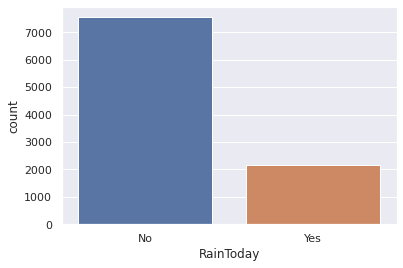

In [20]:
sns.countplot(x="RainToday",data=tdf)

In [21]:
 tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9710 entries, 125360 to 62795
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9710 non-null   object 
 1   Location       9710 non-null   object 
 2   MinTemp        9667 non-null   float64
 3   MaxTemp        9684 non-null   float64
 4   Rainfall       9710 non-null   float64
 5   Evaporation    5609 non-null   float64
 6   Sunshine       5115 non-null   float64
 7   WindGustDir    9050 non-null   object 
 8   WindGustSpeed  9055 non-null   float64
 9   WindDir9am     9049 non-null   object 
 10  WindDir3pm     9428 non-null   object 
 11  WindSpeed9am   9632 non-null   float64
 12  WindSpeed3pm   9511 non-null   float64
 13  Humidity9am    9590 non-null   float64
 14  Humidity3pm    9439 non-null   float64
 15  Pressure9am    8745 non-null   float64
 16  Pressure3pm    8740 non-null   float64
 17  Cloud9am       6091 non-null   float64
 18  Cl

In [30]:
print(tdf.shape)
print(tdf.ndim)
print(tdf.size)

(9710, 23)
2
223330


In [22]:
unique_val = []
for i in tdf.select_dtypes(include=['object']).columns:
    u = tdf[i].nunique()
    unique_val.append(u)
    
pd.DataFrame({"No. of unique values": unique_val}, index=tdf.select_dtypes(include=['object']).columns)

,No. of unique values
Date,3002
Location,49
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2
RainTomorrow,2


In [23]:
tdf_multi = tdf.copy()
tdf_multi = tdf_multi.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','Date'], axis=1)
tdf_multi = pd.get_dummies(tdf_multi, drop_first=True, columns = ['RainToday','RainTomorrow'], prefix = ['RainToday','RainTomorrow'])
tdf_multi.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
125360,7.3,13.7,0.4,NaN,NaN,17.0,6.0,13.0,93.0,77.0,NaN,NaN,NaN,NaN,9.4,12.6,0,0
82516,9.1,15.3,0.0,1.4,1.1,15.0,0.0,9.0,100.0,73.0,1031.4,1028.6,NaN,NaN,10.4,14.4,0,0
51882,15.8,31.7,0.0,NaN,NaN,35.0,0.0,13.0,65.0,32.0,1012.0,1008.3,NaN,NaN,23.5,30.2,0,0
64244,13.4,35.0,0.0,6.6,9.0,56.0,24.0,28.0,46.0,10.0,1010.6,1007.8,6.0,2.0,21.1,33.2,0,0
100968,14.5,22.3,0.8,8.4,11.4,61.0,31.0,31.0,65.0,27.0,1012.3,1015.5,6.0,3.0,16.7,20.5,0,0


In [33]:
tdf.isnull().sum()

Date                0
Location            0
MinTemp            43
MaxTemp            26
Rainfall            0
Evaporation      4101
Sunshine         4595
WindGustDir       660
WindGustSpeed     655
WindDir9am        661
WindDir3pm        282
WindSpeed9am       78
WindSpeed3pm      199
Humidity9am       120
Humidity3pm       271
Pressure9am       965
Pressure3pm       970
Cloud9am         3619
Cloud3pm         3878
Temp9am            64
Temp3pm           206
RainToday           0
RainTomorrow        0
dtype: int64

In [24]:
# DecisionTreeRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

index = tdf_multi.index
columns = tdf_multi.columns

imp_mean = IterativeImputer(random_state=0, estimator=DecisionTreeRegressor())
imp_mean.fit(tdf_multi)
tdf_multi_imputed = imp_mean.transform(tdf_multi)
tdf_multi_imputed

array([[ 7.3, 13.7,  0.4, ..., 12.6,  0. ,  0. ],
       [ 9.1, 15.3,  0. , ..., 14.4,  0. ,  0. ],
       [15.8, 31.7,  0. , ..., 30.2,  0. ,  0. ],
       ...,
       [11.8, 18.5,  0. , ..., 17.7,  0. ,  0. ],
       [12.7, 23.7,  0. , ..., 22.8,  0. ,  0. ],
       [10.5, 19.7,  1.8, ..., 19.3,  1. ,  1. ]])

In [25]:
tdf_multi_imputed = pd.DataFrame(tdf_multi_imputed, index=index, columns=columns)
tdf_multi_imputed.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday_Yes       0
RainTomorrow_Yes    0
dtype: int64

In [27]:
tdf_multi_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9710 entries, 125360 to 62795
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           9710 non-null   float64
 1   MaxTemp           9710 non-null   float64
 2   Rainfall          9710 non-null   float64
 3   Evaporation       9710 non-null   float64
 4   Sunshine          9710 non-null   float64
 5   WindGustSpeed     9710 non-null   float64
 6   WindSpeed9am      9710 non-null   float64
 7   WindSpeed3pm      9710 non-null   float64
 8   Humidity9am       9710 non-null   float64
 9   Humidity3pm       9710 non-null   float64
 10  Pressure9am       9710 non-null   float64
 11  Pressure3pm       9710 non-null   float64
 12  Cloud9am          9710 non-null   float64
 13  Cloud3pm          9710 non-null   float64
 14  Temp9am           9710 non-null   float64
 15  Temp3pm           9710 non-null   float64
 16  RainToday_Yes     9710 non-null   fl

In [28]:
tdf_multi_imputed.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday_Yes       0
RainTomorrow_Yes    0
dtype: int64

<AxesSubplot:xlabel='RainTomorrow_Yes', ylabel='count'>

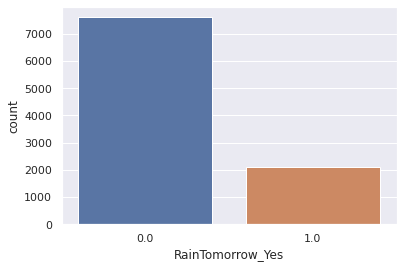

In [35]:
sns.countplot(x="RainTomorrow_Yes",data=tdf_multi_imputed)

# PREDICTION WITH CLASSIFICATION METHODS
# Preparation dependent and independent variables

In [37]:
tdf2 = tdf_multi_imputed.copy()
x_dat = tdf2.drop(['RainTomorrow_Yes'],axis=1)
y = tdf2["RainTomorrow_Yes"].values

# Normalization of variables

In [38]:
#If there is a outlier values, it must be done before coming here
x=(x_dat-np.min(x_dat))/(np.max(x_dat)-np.min(x_dat)).values  

# Test-Train splitting

In [40]:

from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# 1) logistic regression
# A ) Modeling of Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression() #default olanlar gelir.C var..
lr_model.fit(x_train,y_train)

LogisticRegression()

In [43]:
print(lr_model.intercept_)
print(lr_model.coef_)#Bu katsayilar denklemin katsayilari(ax+b.. gibi). mesela (-) olanlar ters yonde etkiliyor.

[-3.19939861]
[[ 0.11517308  0.19006877  1.41885664  0.49225649 -1.75048221  4.7987076
  -0.87744214 -1.19591359  0.28237441  4.50699685  0.9747987  -4.21273719
  -0.14071505  0.6905427   0.43520336 -0.01613022  0.53427378]]


# B ) Prediction of Logistic Regression

In [45]:
y_pred=lr_model.predict(x_test)

In [46]:
y_pred[0:10]#tahminlerin ilk 10 degerini gorduk

array([0., 1., 0., 1., 1., 0., 1., 0., 0., 0.])

# C ) Accuracy Test(for default) of Logistic regression

In [47]:
accuracy_score(y_test,y_pred)

0.841743906625472

# Proba values - probability¶

In [48]:
y_probs = lr_model.predict_proba(x_test)[:,1]

In [49]:
y_probs

array([0.08350388, 0.8595438 , 0.20296584, ..., 0.63443536, 0.05952107,
       0.3604688 ])

In [68]:

y_pred = [1 if i >0.65 else 0 for i in y_probs]
y_pred[:10]

[0, 1, 0, 1, 0, 0, 0, 0, 0, 0]

In [69]:
log_score = accuracy_score(y_test,y_pred)
print ("log score=",log_score)

log score= 0.8362512873326468


In [70]:
confusion_matrix(y_test,y_pred)

array([[2245,   72],
       [ 405,  191]])

# D ) Model tuning of Logistic regression

In [71]:
lr_model = LogisticRegression(solver = "liblinear")
lr_model= lr_model.fit(x_train,y_train)
lr_model

LogisticRegression(solver='liblinear')

In [72]:
lr_model.predict(x_test)

array([0., 1., 0., ..., 1., 0., 0.])

In [73]:
accuracy_score(y_test, lr_model.predict(x_test))

0.841743906625472

In [74]:
#Cross validation (10 katli ) yaparsak
lr_finalscore=cross_val_score(lr_model, x_test, y_test, cv = 10).mean()
lr_finalscore

0.8383079131949348


# 2) Modeling of Gaussian Naive Bayes
  # A ) Modeling of NB


In [75]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)
nb_model

GaussianNB()

# B ) Prediction of NB

In [76]:
y_pred = nb_model.predict(x_test)
y_pred

array([0., 1., 0., ..., 1., 0., 1.])

# C ) Accuracy score of NB

In [77]:
accuracy_score(y_test,y_pred)

0.7995193958118778

In [78]:
confusion_matrix(y_test,y_pred)

array([[1948,  369],
       [ 215,  381]])

# D ) Model Tuning of NB

In [79]:
# 10 katli cross validation.
nb_finalscore=cross_val_score(nb_model, x_test, y_test, cv = 10).mean()
nb_finalscore

0.7953878924822295

# 3 ) KNN
  # A ) Modeling of KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model = knn_model.fit(x_train, y_train)
knn_model

KNeighborsClassifier()

# B ) Prediction of KNN

In [81]:
y_pred = knn_model.predict(x_test)

# C ) Accuracy score of KNN

In [82]:
accuracy_score(y_test, y_pred)

0.8280123583934088

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      2317
         1.0       0.61      0.44      0.51       596

    accuracy                           0.83      2913
   macro avg       0.74      0.69      0.70      2913
weighted avg       0.81      0.83      0.82      2913



In [84]:
confusion_matrix(y_test,y_pred)

array([[2148,  169],
       [ 332,  264]])

# D ) Model Tuning of KNN

In [87]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [88]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [89]:
print("The best score:" + str(knn_cv.best_score_))
print("The best parameters: " + str(knn_cv.best_params_))

The best score:0.8455182794767391
The best parameters: {'n_neighbors': 35}


In [90]:
knn = KNeighborsClassifier(3)  #we choose 3 neigboors. I think 1 is not good 
knn_tuned = knn.fit(x_train, y_train)

In [91]:
knn_finalscore=knn_tuned.score(x_test, y_test)
knn_finalscore

0.8163405423961552

# 4 )SVC
  # A ) Modeling of SVC

In [92]:
from sklearn.svm import SVC
svm_model = SVC().fit(x_train,y_train)#we choose default c:1,kernel:'rbf',dagree:3...
#?svm_model

# B ) Prediction of SVC

In [93]:
y_pred = svm_model.predict(x_test)

# C ) Accuracy score of SVC

In [94]:
accuracy_score(y_test,y_pred)

0.8369378647442499

# D ) Model Tuning of SVC
   # For kernel:rbf

In [95]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "rbf")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1,        
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   42.1s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [96]:
print("The best parameters: " + str(svc_cv_model.best_params_))

The best parameters: {'C': 6}


In [97]:
svc_tuned1 = SVC(kernel = "rbf", C = 6).fit(x_train, y_train)

y_pred = svc_tuned1.predict(x_test)
accuracy_score(y_test, y_pred)

0.845863371095091

# For kernel:linear

In [98]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   26.0s finished


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [99]:
print("The best parameters: " + str(svc_cv_model.best_params_))

The best parameters: {'C': 9}


In [101]:
svc_tuned2 = SVC(kernel = "linear", C = 9).fit(x_train, y_train)
y_pred = svc_tuned2.predict(x_test)
accuracy_score(y_test, y_pred)

0.8468932372124958

# For kernel:rbf , C and gamma

In [102]:
svc_model = SVC(kernel = "rbf").fit(x_train, y_train)

In [103]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [104]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  6.4min finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [105]:
print("The best parameters: " + str(svc_cv_model.best_params_))

The best parameters: {'C': 100, 'gamma': 0.001}


In [106]:
svc_tuned3 = SVC(C = 100, gamma =0.001).fit(x_train, y_train)
y_pred = svc_tuned3.predict(x_test)
svc_finalscore=accuracy_score(y_test, y_pred)
svc_finalscore

0.839340885684861

In [117]:
print(lr_finalscore,nb_finalscore,knn_finalscore,svc_finalscore)

0.8383079131949348 0.7953878924822295 0.8163405423961552 0.839340885684861


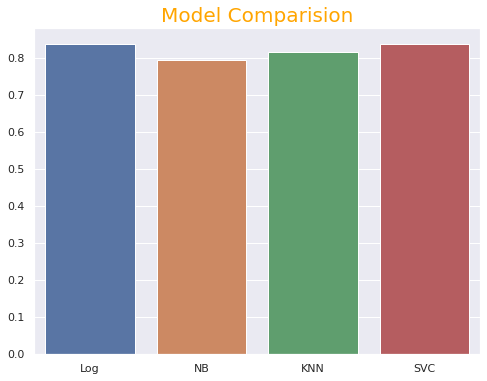

In [116]:

indexx = ["Log","NB","KNN","SVC"]
regressions = [lr_finalscore,nb_finalscore,knn_finalscore,svc_finalscore]

plt.figure(figsize=(8,6))
sns.barplot(x=indexx,y=regressions)
plt.xticks()
plt.title('Model Comparision',color = 'orange',fontsize=20);

